In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
sales = pd.read_csv("D:/Projects/inventory_optimization/data/SalesFINAL12312016.csv")
sales["SalesDate"] = pd.to_datetime(sales["SalesDate"])

In [30]:
abc_df = (
    sales
    .groupby("Description", as_index=False)["SalesDollars"]
    .sum()
    .sort_values(by="SalesDollars", ascending=False)
)


In [31]:
abc_df["CumulativeSales"] = abc_df["SalesDollars"].cumsum()
abc_df["CumulativePercentage"] = (
    abc_df["CumulativeSales"] / abc_df["SalesDollars"].sum() * 100
)


In [32]:
def abc_class(pct):
    if pct <= 70:
        return "A"
    elif pct <= 90:
        return "B"
    else:
        return "C"

abc_df["ABC_Class"] = abc_df["CumulativePercentage"].apply(abc_class)


In [33]:
abc_df["ABC_Class"].value_counts()

C    4931
B    1285
A     674
Name: ABC_Class, dtype: int64

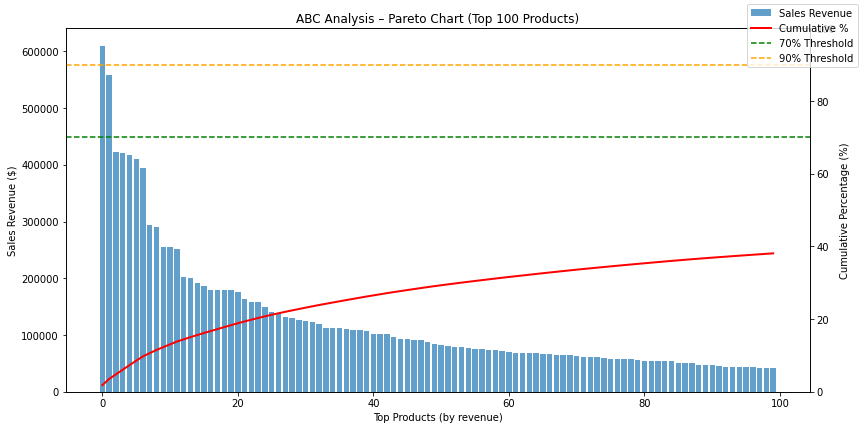

In [ ]:
top_n = 100
abc_top = abc_df.head(top_n)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(
    range(len(abc_top)),
    abc_top["SalesDollars"],
    alpha=0.7,
    label="Sales Revenue"
)
ax1.set_xlabel("Top Products (by revenue)")
ax1.set_ylabel("Sales Revenue ($)")

ax2 = ax1.twinx()
ax2.plot(
    range(len(abc_top)),
    abc_top["CumulativePercentage"],
    color="red",
    linewidth=2,
    label="Cumulative %"
)
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.set_ylim(0, 100)

ax2.axhline(70, color="green", linestyle="--", label="70% Threshold")
ax2.axhline(90, color="orange", linestyle="--", label="90% Threshold")

fig.legend(loc="upper right")
plt.title("ABC Analysis – Pareto Chart (Top 100 Products)")
plt.tight_layout()
plt.show()


ABC Analysis (Pareto Principle):
The Pareto chart illustrates a strong concentration of sales revenue among a limited number of products. Approximately 10% of products (Class A) contribute close to 70% of total sales, while the majority of products fall into Class C with minimal individual impact. This validates the use of differentiated inventory strategies, where A-class products require tighter demand forecasting and replenishment control, and B/C items can be managed with simplified policies.